## Import necessary libreries

In [96]:
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau 
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D 
from tensorflow.keras.models import Sequential

## Inspect the dataset

In [3]:
root_path ='/kaggle/input/shai-level-2-training-2023'
train_path = root_path+'/train'
test_path = root_path+'/test'

In [4]:
os.listdir(root_path)

['sample_submission.csv', 'train.csv', 'test', 'train']

## Total number of test samples

In [5]:
train_covid = len(os.listdir(train_path+'/covid'))
train_normal = len(os.listdir(train_path+'/normal'))
train_virus = len(os.listdir(train_path+'/virus'))
print("Total number of images in train set", (train_normal+train_virus+train_covid))

Total number of images in train set 1196


In [6]:
test = len(os.listdir(test_path))
print("Total number of images in test set", (test))

Total number of images in test set 513


In [7]:
os.listdir(train_path)

['normal', 'covid', 'virus']

## A function for displaying images

In [8]:
def plot_image(path, title):
    image_filenames = os.listdir(path)
    fig, axs = plt.subplots(1, 4, figsize=(20,10))
    for i in range(4):
        image_data = plt.imread(path + '/' + image_filenames[i])
        print(image_data.shape)
        axs[i].imshow(image_data, cmap="gray")
        axs[i].set_title(title)
    plt.show()

## Read an image from each class and display 

(1754, 1928)
(1171, 1314)
(2237, 2260)
(1916, 1886)


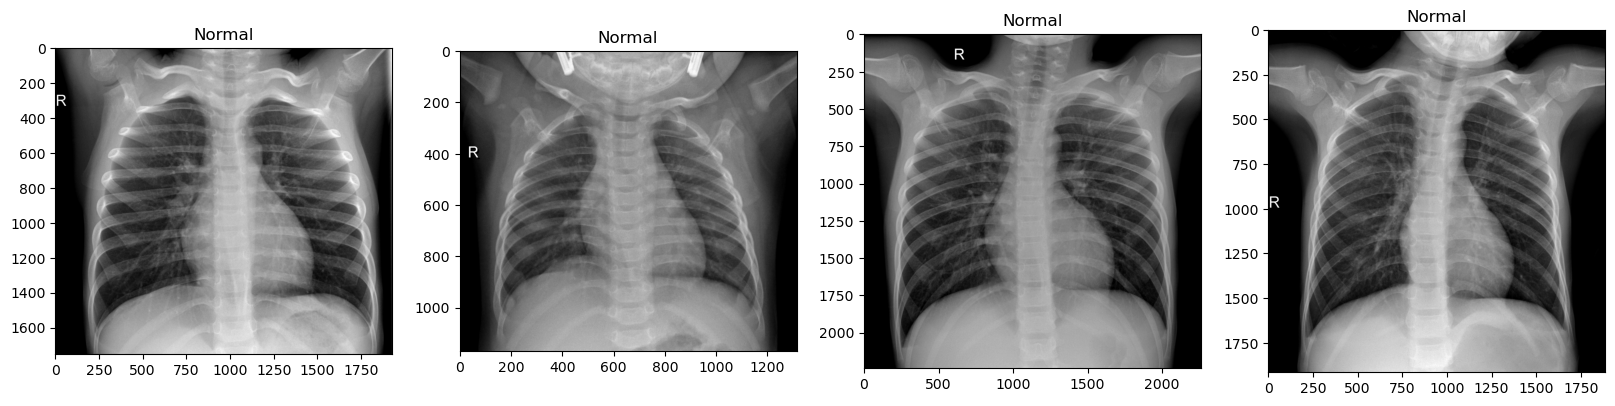

In [9]:
image_folder_path = train_path + '/normal'
plot_image(image_folder_path, "Normal")

(480, 640, 3)
(480, 640, 3)
(247, 256, 4)
(842, 1024, 3)


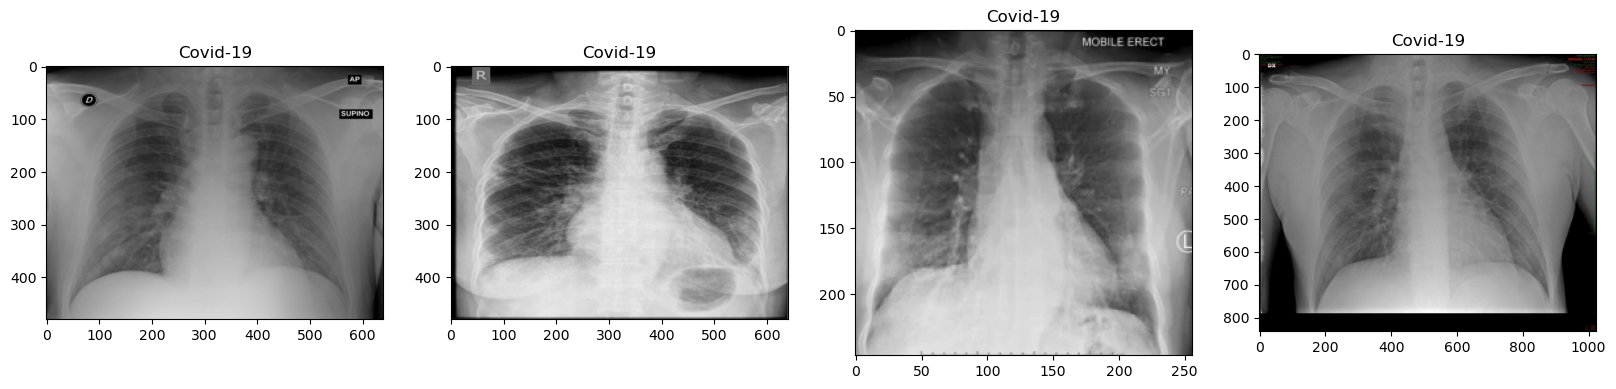

In [10]:
image_folder_path = train_path + '/covid'
plot_image(image_folder_path, "Covid-19")

(1192, 1536)
(832, 1284)
(800, 1312)
(709, 1236)


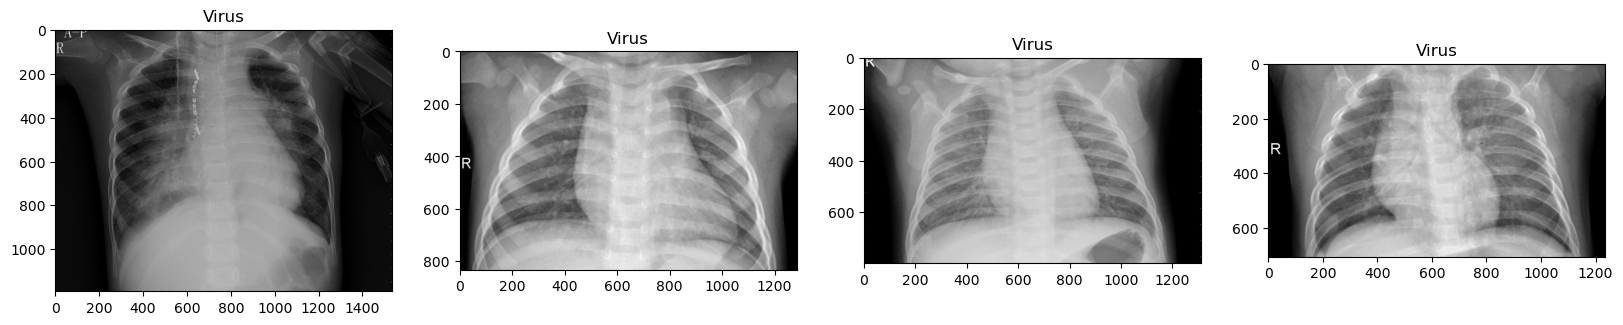

In [11]:
image_folder_path = train_path + '/virus'
plot_image(image_folder_path, "Virus")

In [12]:
image_shape = (128,128,3)

## ImageDataGenerator

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=.1,
                               height_shift_range=.1,
                               shear_range=.1,
                               zoom_range = .1,
                               horizontal_flip=True,
                               fill_mode='nearest')

#print(image_gen)

## Train and Test generators

In [14]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=16,
                                                class_mode='binary')

test_image_gen = image_gen.flow_from_directory(test_path,classes=['.'],
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=16,
                                                class_mode='binary')

Found 1196 images belonging to 3 classes.
Found 513 images belonging to 1 classes.


## The MODEL  :)

In [70]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [67]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_15 (Flatten)        (None, 50176)           

## Compile the model

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Early Stopping callback

In [101]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy',patience=4, mode='auto')

## Fit the model

In [102]:
history = model.fit(train_image_gen, epochs=15, batch_size=50,
                    validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/15
75/75 [==============================] - 38s 505ms/step - loss: 0.6120 - accuracy: 0.7952 - val_loss: 4.3585 - val_accuracy: 0.2904
Epoch 2/15
75/75 [==============================] - 38s 507ms/step - loss: 0.3676 - accuracy: 0.8771 - val_loss: 7.2284 - val_accuracy: 0.2261
Epoch 3/15
75/75 [==============================] - 38s 508ms/step - loss: 0.3932 - accuracy: 0.8620 - val_loss: 4.6185 - val_accuracy: 0.2086
Epoch 4/15
75/75 [==============================] - 37s 497ms/step - loss: 0.3214 - accuracy: 0.8846 - val_loss: 5.7204 - val_accuracy: 0.2593
Epoch 5/15
75/75 [==============================] - 37s 495ms/step - loss: 0.3575 - accuracy: 0.8645 - val_loss: 5.3915 - val_accuracy: 0.2846
Epoch 6/15
75/75 [==============================] - 37s 498ms/step - loss: 0.5036 - accuracy: 0.8428 - val_loss: 4.6848 - val_accuracy: 0.2125
Epoch 7/15
75/75 [==============================] - 37s 499ms/step - loss: 0.5103 - accuracy: 0.8085 - val_loss: 5.1780 - val_accuracy: 0.2105

## Accuracy vs validation loss

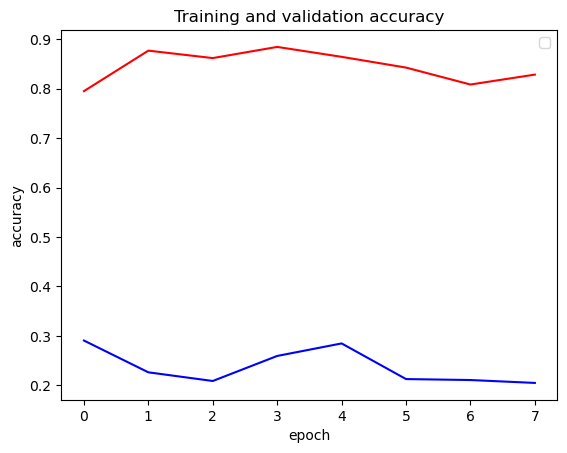

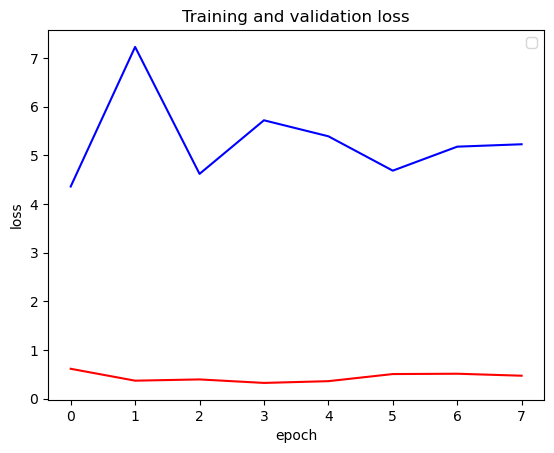

In [108]:
#Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r' )
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

## Evaluate the mode

In [109]:
test_loss, test_acc = model.evaluate(train_image_gen,verbose=2)

75/75 - 23s - loss: 0.4181 - accuracy: 0.8411 - 23s/epoch - 313ms/step


In [110]:
print(test_acc) 

0.8411371111869812


In [129]:
train_covid = os.listdir(train_path+'/covid')
train_normal = os.listdir(train_path+'/normal')
train_virus = os.listdir(train_path+'/virus')

In [134]:
covid_list =[]
normal_list = []
virus_list = []
for image_names in train_covid:
    covid_list.append(image_names)

for image_names in train_normal:
    normal_list.append(image_names)
    
for image_names in train_virus:
    virus_list.append(image_names)

In [162]:
covid_df = {
    "Image":covid_list,
    "Label":"covid"    
}
train_covid_df = pd.DataFrame(covid_df)

normal_df = {
    "Image":normal_list,
    "Label":"normal"    
}
train_normal_df = pd.DataFrame(normal_df)

virus_df = {
    "Image":virus_list,
    "Label":"virus"    
}
train_virus_df = pd.DataFrame(virus_df)

In [161]:
result_df =[train_covid_df,train_normal_df,train_virus_df]
train_df = pd.concat(result_df)
train_df = train_df.sample(frac = 1)
train_df.head()

,Image,Label
366,76896453.jpeg,virus
244,130772883.png,covid
279,412205045.jpeg,virus
287,313240578.jpeg,virus
263,353806796.png,covid


In [170]:
train_df.to_csv("/kaggle/working/train.csv",index= False)

In [172]:
test_list = os.listdir(test_path)
test_df= {
    "Image":test_list   
}
test_df = pd.DataFrame(test_df)

In [175]:
test_df.to_csv("/kaggle/working/test.csv",index= False)

In [171]:
training_df = pd.read_csv("/kaggle/working/train.csv")
testing_df = pd.read_csv("/kaggle/working/test.csv")
